# Analysis from ENADE microdata for 2017

## Import libs

In [1]:
import pandas as pd
from apyori import apriori


## Read microdata file

In [2]:
data = pd.read_csv('../microdata/microdata-enade-2017.csv', sep=';', encoding='ISO-8859-1', low_memory=False)
data


,nu_ano_enade,co_ies,no_ies,sg_ies,co_mantenedora_ies,no_mantenedora_ies,tp_categoria_administrativa_ies,no_categoria_administrativa_ies,tp_organizacao_academica_ies,no_organizacao_academica_ies,...,q72,q73,q74,q75,q76,q77,q78,q79,q80,q81
0,2017,322,UNIVERSIDADE PAULISTA,UNIP,2415.0,ASSOCIACAO UNIFICADA PAULISTA DE ENSINO RENOVA...,5.0,Privada sem fins lucrativos,1.0,Universidade,...,*,*,*,*,*,*,*,*,*,*
1,2017,322,UNIVERSIDADE PAULISTA,UNIP,2415.0,ASSOCIACAO UNIFICADA PAULISTA DE ENSINO RENOVA...,5.0,Privada sem fins lucrativos,1.0,Universidade,...,*,*,*,*,*,*,*,*,*,*
2,2017,322,UNIVERSIDADE PAULISTA,UNIP,2415.0,ASSOCIACAO UNIFICADA PAULISTA DE ENSINO RENOVA...,5.0,Privada sem fins lucrativos,1.0,Universidade,...,*,*,*,*,*,*,*,*,*,*
3,2017,322,UNIVERSIDADE PAULISTA,UNIP,2415.0,ASSOCIACAO UNIFICADA PAULISTA DE ENSINO RENOVA...,5.0,Privada sem fins lucrativos,1.0,Universidade,...,*,*,*,*,*,*,*,*,*,*
4,2017,322,UNIVERSIDADE PAULISTA,UNIP,2415.0,ASSOCIACAO UNIFICADA PAULISTA DE ENSINO RENOVA...,5.0,Privada sem fins lucrativos,1.0,Universidade,...,*,*,*,*,*,*,*,*,*,*
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
537431,2017,514,CENTRO UNIVERSITÁRIO DE BARRA MANSA,UBM,355.0,SOBEU - ASSOCIACAO BARRAMANSENSE DE ENSINO,5.0,Privada sem fins lucrativos,2.0,Centro Universitário,...,*,*,*,*,*,*,*,*,*,*
537432,2017,514,CENTRO UNIVERSITÁRIO DE BARRA MANSA,UBM,355.0,SOBEU - ASSOCIACAO BARRAMANSENSE DE ENSINO,5.0,Privada sem fins lucrativos,2.0,Centro Universitário,...,*,*,*,*,*,*,*,*,*,*
537433,2017,514,CENTRO UNIVERSITÁRIO DE BARRA MANSA,UBM,355.0,SOBEU - ASSOCIACAO BARRAMANSENSE DE ENSINO,5.0,Privada sem fins lucrativos,2.0,Centro Universitário,...,*,*,*,*,*,*,*,*,*,*
537434,2017,514,CENTRO UNIVERSITÁRIO DE BARRA MANSA,UBM,355.0,SOBEU - ASSOCIACAO BARRAMANSENSE DE ENSINO,5.0,Privada sem fins lucrativos,2.0,Centro Universitário,...,*,*,*,*,*,*,*,*,*,*


## Select only columns of interest

In [3]:
interest_columns = [
    'no_categoria_administrativa_ies',
    'no_organizacao_academica_ies',
    'no_regiao_ies',
    'no_grau_academico',
    'no_modalidade',
    'faixa_etaria',
    'tp_sexo',
    'no_pres',
    'nt_ger',
    'q1', # Estado civil
    'q2', # Cor ou raça
    'q4', # Escolaridade do pai
    'q5', # Escolaridade da mãe
    'q8', # Renda total da família
    'q9', # Situação financeira
    'q10', # Situação de trabalho
    'q15', # Entrou por alguma política afirmativa?
    'q17', # Em que tipo de escola cursou o EM?
    'q21', # Alguém da família concluiu ensino superior?
    'q58', # Docentes utilizaram TICs como estratégia de ensino?
]

interest_data = data[interest_columns]

interest_data.head()


,no_categoria_administrativa_ies,no_organizacao_academica_ies,no_regiao_ies,no_grau_academico,no_modalidade,faixa_etaria,tp_sexo,no_pres,nt_ger,q1,q2,q4,q5,q8,q9,q10,q15,q17,q21,q58
0,Privada sem fins lucrativos,Universidade,Sudeste,Licenciatura,EaD,10,M,NaN,NaN,*,*,*,*,*,*,*,*,*,*,*
1,Privada sem fins lucrativos,Universidade,Sudeste,Tecnológico,EaD,4,M,NaN,NaN,*,*,*,*,*,*,*,*,*,*,*
2,Privada sem fins lucrativos,Universidade,Sudeste,Tecnológico,EaD,4,M,NaN,NaN,*,*,*,*,*,*,*,*,*,*,*
3,Privada sem fins lucrativos,Universidade,Sudeste,Tecnológico,EaD,5,M,NaN,NaN,*,*,*,*,*,*,*,*,*,*,*
4,Privada sem fins lucrativos,Universidade,Sudeste,Licenciatura,EaD,8,F,NaN,NaN,*,*,*,*,*,*,*,*,*,*,*


### Check count for valid values

In [4]:
interest_data.count()


no_categoria_administrativa_ies    537327
no_organizacao_academica_ies       537327
no_regiao_ies                      537327
no_grau_academico                  535243
no_modalidade                      537436
faixa_etaria                       537436
tp_sexo                            537436
no_pres                            537425
nt_ger                             449932
q1                                 537436
q2                                 537436
q4                                 537436
q5                                 537436
q8                                 537436
q9                                 537436
q10                                537436
q15                                537436
q17                                537436
q21                                537436
q58                                537436
dtype: int64

## Translate some columns to better readability

In [5]:
%run '../scripts/attribute-dictionary.py'

interest_data = interest_data.replace(dictionary_params)

interest_data['nt_ger'] = interest_data['nt_ger'].str.replace(',', '.')
interest_data["NOTA_GERAL"] = pd.to_numeric(interest_data["nt_ger"], errors='coerce')

interest_data.head()


,no_categoria_administrativa_ies,no_organizacao_academica_ies,no_regiao_ies,no_grau_academico,no_modalidade,faixa_etaria,tp_sexo,no_pres,nt_ger,q1,...,q4,q5,q8,q9,q10,q15,q17,q21,q58,NOTA_GERAL
0,Privada sem fins lucrativos,Universidade,Sudeste,Licenciatura,EaD,Entre 50 e 57 anos,Masculino,NaN,NaN,*,...,*,*,*,*,*,*,*,*,*,NaN
1,Privada sem fins lucrativos,Universidade,Sudeste,Tecnológico,EaD,Entre 26 e 33 anos,Masculino,NaN,NaN,*,...,*,*,*,*,*,*,*,*,*,NaN
2,Privada sem fins lucrativos,Universidade,Sudeste,Tecnológico,EaD,Entre 26 e 33 anos,Masculino,NaN,NaN,*,...,*,*,*,*,*,*,*,*,*,NaN
3,Privada sem fins lucrativos,Universidade,Sudeste,Tecnológico,EaD,Entre 26 e 33 anos,Masculino,NaN,NaN,*,...,*,*,*,*,*,*,*,*,*,NaN
4,Privada sem fins lucrativos,Universidade,Sudeste,Licenciatura,EaD,Entre 42 e 49 anos,Feminino,NaN,NaN,*,...,*,*,*,*,*,*,*,*,*,NaN


## Remove nil values and filter by relevant data

In [6]:
interest_data = interest_data.query("no_categoria_administrativa_ies.notnull() and no_organizacao_academica_ies.notnull() and no_regiao_ies.notnull() and no_grau_academico.notnull() and no_modalidade.notnull() and faixa_etaria.notnull() and tp_sexo.notnull() and no_pres.notnull() and nt_ger.notnull() and q1.notnull() and q2.notnull() and q4.notnull() and q5.notnull() and q8.notnull() and q9.notnull() and q10.notnull() and q15.notnull() and q17.notnull() and q21.notnull() and q58.notnull() and no_pres == 'Presente com resultado válido'")
interest_data = interest_data.query("no_categoria_administrativa_ies != '*' and no_organizacao_academica_ies != '*' and no_regiao_ies != '*' and no_grau_academico != '*' and no_modalidade != '*' and faixa_etaria != '*' and tp_sexo != '*' and no_pres != '*' and nt_ger != '*' and q1 != '*' and q2 != '*' and q4 != '*' and q5 != '*' and q8 != '*' and q9 != '*' and q10 != '*' and q15 != '*' and q17 != '*' and q21 != '*' and q58 != '*'")

interest_data.head()


,no_categoria_administrativa_ies,no_organizacao_academica_ies,no_regiao_ies,no_grau_academico,no_modalidade,faixa_etaria,tp_sexo,no_pres,nt_ger,q1,...,q4,q5,q8,q9,q10,q15,q17,q21,q58,NOTA_GERAL
86384,Pública Federal,Universidade,Norte,Licenciatura,EaD,Entre 34 e 41 anos,Feminino,Presente com resultado válido,18,Solteiro(a),...,Pai: Ensino Fundamental I,Mãe: Ensino Fundamental I,Classe Social E,"Sem renda, financiado por familiares ou outros",Não estou trabalhando,Não entrei por cotas,EM: Todo em escola pública,Tenho familiar com graduação,IE Usou TICs: Concordo totalmente,18.0
86385,Pública Federal,Universidade,Norte,Licenciatura,EaD,Entre 42 e 49 anos,Feminino,Presente com resultado válido,24.5,Solteiro(a),...,Pai: Nenhuma escolaridade,Mãe: Nenhuma escolaridade,Classe Social E,Sou o principal responsável pelo sustento da f...,Trabalho 40 horas semanais ou mais,Não entrei por cotas,EM: Todo em escola pública,Não tenho familiar com graduação,IE Usou TICs: Concordo totalmente,24.5
86386,Pública Federal,Universidade,Norte,Licenciatura,EaD,Entre 34 e 41 anos,Feminino,Presente com resultado válido,22.1,Solteiro(a),...,Pai: Nenhuma escolaridade,Mãe: Ensino Fundamental I,Classe Social E,"Sem renda, financiado por familiares ou outros",Trabalho eventualmente,Não entrei por cotas,EM: Todo em escola pública,Tenho familiar com graduação,IE Usou TICs: Discordo parcialmente,22.1
86387,Pública Federal,Universidade,Norte,Licenciatura,EaD,Entre 34 e 41 anos,Feminino,Presente com resultado válido,48.4,Separado(a),...,Pai: Ensino Fundamental I,Mãe: Ensino Fundamental I,Classe Social E,Sou o principal responsável pelo sustento da f...,Trabalho 40 horas semanais ou mais,Não entrei por cotas,EM: Todo em escola pública,Tenho familiar com graduação,IE Usou TICs: Concordo,48.4
86388,Pública Federal,Universidade,Norte,Licenciatura,EaD,Entre 34 e 41 anos,Feminino,Presente com resultado válido,51.3,Casado(a),...,Pai: Ensino Fundamental I,Mãe: Nenhuma escolaridade,Classe Social E,Tenho renda e contribuo com o sustento da família,Trabalho 40 horas semanais ou mais,Não entrei por cotas,EM: Todo em escola pública,Não tenho familiar com graduação,IE Usou TICs: Concordo totalmente,51.3


### Check count for valid values

In [7]:
interest_data.count()


no_categoria_administrativa_ies    441148
no_organizacao_academica_ies       441148
no_regiao_ies                      441148
no_grau_academico                  441148
no_modalidade                      441148
faixa_etaria                       441148
tp_sexo                            441148
no_pres                            441148
nt_ger                             441148
q1                                 441148
q2                                 441148
q4                                 441148
q5                                 441148
q8                                 441148
q9                                 441148
q10                                441148
q15                                441148
q17                                441148
q21                                441148
q58                                441148
NOTA_GERAL                         441148
dtype: int64

## Calculate Z-SCORE from NU_NOTA_GERAL

In [8]:
from scipy.stats import zscore

interest_data["Z_SCORE_NOTA"] = zscore(interest_data["NOTA_GERAL"])
interest_data.head()


,no_categoria_administrativa_ies,no_organizacao_academica_ies,no_regiao_ies,no_grau_academico,no_modalidade,faixa_etaria,tp_sexo,no_pres,nt_ger,q1,...,q5,q8,q9,q10,q15,q17,q21,q58,NOTA_GERAL,Z_SCORE_NOTA
86384,Pública Federal,Universidade,Norte,Licenciatura,EaD,Entre 34 e 41 anos,Feminino,Presente com resultado válido,18,Solteiro(a),...,Mãe: Ensino Fundamental I,Classe Social E,"Sem renda, financiado por familiares ou outros",Não estou trabalhando,Não entrei por cotas,EM: Todo em escola pública,Tenho familiar com graduação,IE Usou TICs: Concordo totalmente,18.0,-1.823262
86385,Pública Federal,Universidade,Norte,Licenciatura,EaD,Entre 42 e 49 anos,Feminino,Presente com resultado válido,24.5,Solteiro(a),...,Mãe: Nenhuma escolaridade,Classe Social E,Sou o principal responsável pelo sustento da f...,Trabalho 40 horas semanais ou mais,Não entrei por cotas,EM: Todo em escola pública,Não tenho familiar com graduação,IE Usou TICs: Concordo totalmente,24.5,-1.360998
86386,Pública Federal,Universidade,Norte,Licenciatura,EaD,Entre 34 e 41 anos,Feminino,Presente com resultado válido,22.1,Solteiro(a),...,Mãe: Ensino Fundamental I,Classe Social E,"Sem renda, financiado por familiares ou outros",Trabalho eventualmente,Não entrei por cotas,EM: Todo em escola pública,Tenho familiar com graduação,IE Usou TICs: Discordo parcialmente,22.1,-1.531680
86387,Pública Federal,Universidade,Norte,Licenciatura,EaD,Entre 34 e 41 anos,Feminino,Presente com resultado válido,48.4,Separado(a),...,Mãe: Ensino Fundamental I,Classe Social E,Sou o principal responsável pelo sustento da f...,Trabalho 40 horas semanais ou mais,Não entrei por cotas,EM: Todo em escola pública,Tenho familiar com graduação,IE Usou TICs: Concordo,48.4,0.338711
86388,Pública Federal,Universidade,Norte,Licenciatura,EaD,Entre 34 e 41 anos,Feminino,Presente com resultado válido,51.3,Casado(a),...,Mãe: Nenhuma escolaridade,Classe Social E,Tenho renda e contribuo com o sustento da família,Trabalho 40 horas semanais ou mais,Não entrei por cotas,EM: Todo em escola pública,Não tenho familiar com graduação,IE Usou TICs: Concordo totalmente,51.3,0.544952


### Z-SCORE mínimo

In [9]:
interest_data["Z_SCORE_NOTA"].min()


-3.1033779849903675

### Z-SCORE máximo

In [10]:
interest_data["Z_SCORE_NOTA"].max()


3.873252172193255

## Create a label for grade based on z-score

In [11]:
NOTA_GERAL_LABELS = [
  "NOTA: MUITO ABAIXO DA MÉDIA",
  "NOTA: ABAIXO DA MÉDIA",
  "NOTA: MÉDIA",
  "NOTA: ACIMA DA MÉDIA",
  "NOTA: MUITO ACIMA DA MÉDIA",
]

interest_data["CLASSIFICACAO_NOTA"] = pd.cut(interest_data["Z_SCORE_NOTA"], bins=[-10, -2, -1, 1, 2, 10], labels=NOTA_GERAL_LABELS)

interest_data.head()


,no_categoria_administrativa_ies,no_organizacao_academica_ies,no_regiao_ies,no_grau_academico,no_modalidade,faixa_etaria,tp_sexo,no_pres,nt_ger,q1,...,q8,q9,q10,q15,q17,q21,q58,NOTA_GERAL,Z_SCORE_NOTA,CLASSIFICACAO_NOTA
86384,Pública Federal,Universidade,Norte,Licenciatura,EaD,Entre 34 e 41 anos,Feminino,Presente com resultado válido,18,Solteiro(a),...,Classe Social E,"Sem renda, financiado por familiares ou outros",Não estou trabalhando,Não entrei por cotas,EM: Todo em escola pública,Tenho familiar com graduação,IE Usou TICs: Concordo totalmente,18.0,-1.823262,NOTA: ABAIXO DA MÉDIA
86385,Pública Federal,Universidade,Norte,Licenciatura,EaD,Entre 42 e 49 anos,Feminino,Presente com resultado válido,24.5,Solteiro(a),...,Classe Social E,Sou o principal responsável pelo sustento da f...,Trabalho 40 horas semanais ou mais,Não entrei por cotas,EM: Todo em escola pública,Não tenho familiar com graduação,IE Usou TICs: Concordo totalmente,24.5,-1.360998,NOTA: ABAIXO DA MÉDIA
86386,Pública Federal,Universidade,Norte,Licenciatura,EaD,Entre 34 e 41 anos,Feminino,Presente com resultado válido,22.1,Solteiro(a),...,Classe Social E,"Sem renda, financiado por familiares ou outros",Trabalho eventualmente,Não entrei por cotas,EM: Todo em escola pública,Tenho familiar com graduação,IE Usou TICs: Discordo parcialmente,22.1,-1.531680,NOTA: ABAIXO DA MÉDIA
86387,Pública Federal,Universidade,Norte,Licenciatura,EaD,Entre 34 e 41 anos,Feminino,Presente com resultado válido,48.4,Separado(a),...,Classe Social E,Sou o principal responsável pelo sustento da f...,Trabalho 40 horas semanais ou mais,Não entrei por cotas,EM: Todo em escola pública,Tenho familiar com graduação,IE Usou TICs: Concordo,48.4,0.338711,NOTA: MÉDIA
86388,Pública Federal,Universidade,Norte,Licenciatura,EaD,Entre 34 e 41 anos,Feminino,Presente com resultado válido,51.3,Casado(a),...,Classe Social E,Tenho renda e contribuo com o sustento da família,Trabalho 40 horas semanais ou mais,Não entrei por cotas,EM: Todo em escola pública,Não tenho familiar com graduação,IE Usou TICs: Concordo totalmente,51.3,0.544952,NOTA: MÉDIA


## Check for uniqueness of all values to check if all of them was translated

In [12]:
interest_data['no_categoria_administrativa_ies'].unique()


array(['Pública Federal', 'Privada com fins lucrativos',
       'Pública Estadual', 'Privada sem fins lucrativos',
       'Pública Municipal', 'Especial'], dtype=object)

In [13]:
interest_data['no_organizacao_academica_ies'].unique()


array(['Universidade',
       'Instituto Federal de Educação, Ciência e Tecnologia', 'Faculdade',
       'Centro Universitário', 'Centro Federal de Educação Tecnológica'],
      dtype=object)

In [14]:
interest_data['no_regiao_ies'].unique()


array(['Norte', 'Sul', 'Nordeste', 'Sudeste', 'Centro_Oeste'],
      dtype=object)

In [15]:
interest_data['no_grau_academico'].unique()


array(['Licenciatura', 'Bacharelado', 'Tecnológico'], dtype=object)

In [16]:
interest_data['no_modalidade'].unique()


array(['EaD', 'Presencial'], dtype=object)

In [17]:
interest_data['faixa_etaria'].unique()


array(['Entre 34 e 41 anos', 'Entre 42 e 49 anos', 'Entre 58 e 65 anos',
       'Entre 50 e 57 anos', 'Entre 26 e 33 anos', 'Entre 17 e 25 anos',
       'Acima de 65 anos', 'Até 17 anos'], dtype=object)

In [18]:
interest_data['tp_sexo'].unique()


array(['Feminino', 'Masculino'], dtype=object)

In [19]:
interest_data['no_pres'].unique()


array(['Presente com resultado válido'], dtype=object)

In [20]:
interest_data['q1'].unique()


array(['Solteiro(a)', 'Separado(a)', 'Casado(a)', 'Estado Civil: Outro',
       'Viúvo(a)'], dtype=object)

In [21]:
interest_data['q2'].unique()


array(['Parda', 'Branca', 'Amarela', 'Preta', 'Raça/Cor não declarada',
       'Indígena'], dtype=object)

In [22]:
interest_data['q4'].unique()


array(['Pai: Ensino Fundamental I', 'Pai: Nenhuma escolaridade',
       'Pai: Ensino Fundamental II', 'Pai: Ensino Superior - Graduação',
       'Pai: Ensino Médio', 'Pai: Pós-graduação'], dtype=object)

In [23]:
interest_data['q5'].unique()


array(['Mãe: Ensino Fundamental I', 'Mãe: Nenhuma escolaridade',
       'Mãe: Ensino Fundamental II', 'Mãe: Ensino Médio',
       'Mãe: Pós-graduação', 'Mãe: Ensino Superior - Graduação'],
      dtype=object)

In [24]:
interest_data['q8'].unique()


array(['Classe Social E', 'Classe Social D', 'Classe Social C',
       'Classe Social B', 'Classe Social A'], dtype=object)

In [25]:
interest_data['q9'].unique()


array(['Sem renda, financiado por familiares ou outros',
       'Sou o principal responsável pelo sustento da família',
       'Tenho renda e contribuo com o sustento da família',
       'Tenho renda, recebo ajuda de familiares ou outros',
       'Tenho renda e não preciso de ajuda',
       'Sem renda, financiado por programas de governo'], dtype=object)

In [26]:
interest_data['q10'].unique()


array(['Não estou trabalhando', 'Trabalho 40 horas semanais ou mais',
       'Trabalho eventualmente', 'Trabalho de 21 a 39 horas semanais',
       'Trabalho até 20 horas semanais'], dtype=object)

In [27]:
interest_data['q15'].unique()


array(['Não entrei por cotas', 'Entrei com cotas'], dtype=object)

In [28]:
interest_data['q17'].unique()


array(['EM: Todo em escola pública',
       'EM: Todo em escola privada (particular)',
       'EM: A maior parte em escola privada (particular)',
       'EM: A maior parte em escola pública', 'EM: Todo no exterior',
       'EM: Parte no Brasil e parte no exterior'], dtype=object)

In [29]:
interest_data['q21'].unique()


array(['Tenho familiar com graduação', 'Não tenho familiar com graduação'],
      dtype=object)

In [30]:
interest_data['q58'].unique()


array(['IE Usou TICs: Concordo totalmente',
       'IE Usou TICs: Discordo parcialmente', 'IE Usou TICs: Concordo',
       'IE Usou TICs: Discordo', 'IE Usou TICs: Concordo parcialmente',
       'IE Usou TICs: Discordo totalmente',
       'IE Usou TICs: Não sei responder', 'IE Usou TICs: Não se aplica'],
      dtype=object)

## Generate histograms by grade z-score

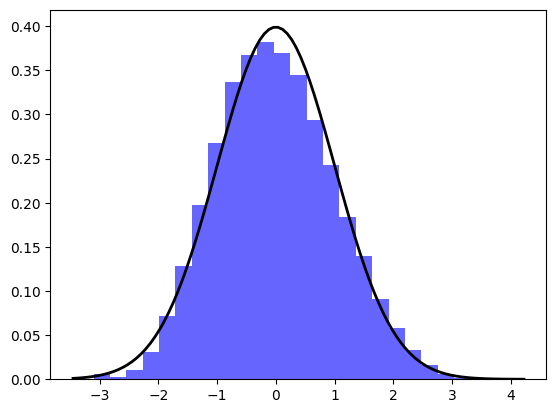

In [31]:
import matplotlib.pyplot as plt
from scipy.stats import norm
import numpy as np

data = interest_data['Z_SCORE_NOTA'].to_numpy()

mu, std = norm.fit(data)

# Plot the histogram.
plt.hist(data, bins=25, density=True, alpha=0.6, color='b')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)

plt.plot(x, p, 'k', linewidth=2)

plt.show()


## Generate histograms by grade

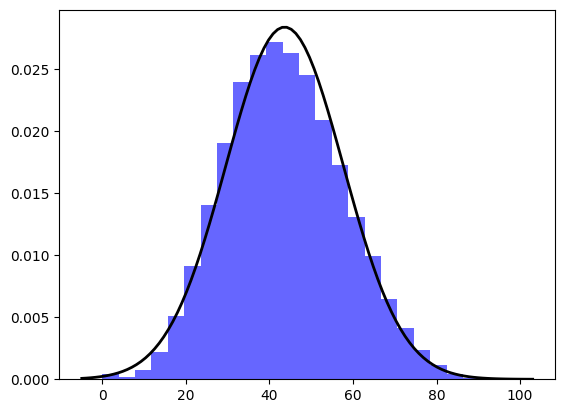

In [32]:
import matplotlib.pyplot as plt
from scipy.stats import norm
import numpy as np

data = interest_data['NOTA_GERAL'].to_numpy()

mu, std = norm.fit(data)

# Plot the histogram.
plt.hist(data, bins=25, density=True, alpha=0.6, color='b')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)

plt.plot(x, p, 'k', linewidth=2)

plt.show()


## Filter by grades far above or far below average

In [33]:
filtered_interest_data = interest_data.query("Z_SCORE_NOTA > 2.00 or Z_SCORE_NOTA < -2.00")
filtered_interest_data.count()


no_categoria_administrativa_ies    17982
no_organizacao_academica_ies       17982
no_regiao_ies                      17982
no_grau_academico                  17982
no_modalidade                      17982
faixa_etaria                       17982
tp_sexo                            17982
no_pres                            17982
nt_ger                             17982
q1                                 17982
q2                                 17982
q4                                 17982
q5                                 17982
q8                                 17982
q9                                 17982
q10                                17982
q15                                17982
q17                                17982
q21                                17982
q58                                17982
NOTA_GERAL                         17982
Z_SCORE_NOTA                       17982
CLASSIFICACAO_NOTA                 17982
dtype: int64

In [34]:
analysis_interest_columns = [
    'CLASSIFICACAO_NOTA',
    'no_categoria_administrativa_ies',
    'no_organizacao_academica_ies',
    'no_regiao_ies',
    'no_grau_academico',
    'no_modalidade',
    'faixa_etaria',
    'tp_sexo',
    'no_pres',
    'nt_ger',
    'q1', # Estado civil
    'q2', # Cor ou raça
    'q4', # Escolaridade do pai
    'q5', # Escolaridade da mãe
    'q8', # Renda total da família
    'q9', # Situação financeira
    'q10', # Situação de trabalho
    'q15', # Entrou por alguma política afirmativa?
    'q17', # Em que tipo de escola cursou o EM?
    'q21', # Alguém da família concluiu ensino superior?
    'q58', # Docentes utilizaram TICs como estratégia de ensino?
]

analysis_interest_data = filtered_interest_data[analysis_interest_columns]


## Save a CSV file with the analysis interest data

In [35]:
import os

os.makedirs('analysis_interest_data', exist_ok=True)
analysis_interest_data.to_csv('analysis_interest_data/analysis-interest-data-2017.csv')

analysis_file_data = pd.read_csv('analysis_interest_data/analysis-interest-data-2017.csv', sep=',', encoding='UTF-8')
analysis_file_data.head()


,Unnamed: 0,CLASSIFICACAO_NOTA,no_categoria_administrativa_ies,no_organizacao_academica_ies,no_regiao_ies,no_grau_academico,no_modalidade,faixa_etaria,tp_sexo,no_pres,...,q2,q4,q5,q8,q9,q10,q15,q17,q21,q58
0,86569,NOTA: MUITO ABAIXO DA MÉDIA,Pública Federal,Universidade,Norte,Licenciatura,EaD,Entre 42 e 49 anos,Feminino,Presente com resultado válido,...,Branca,Pai: Nenhuma escolaridade,Mãe: Nenhuma escolaridade,Classe Social D,Sou o principal responsável pelo sustento da f...,Trabalho 40 horas semanais ou mais,Entrei com cotas,EM: Todo em escola pública,Não tenho familiar com graduação,IE Usou TICs: Concordo totalmente
1,86571,NOTA: MUITO ABAIXO DA MÉDIA,Pública Federal,Universidade,Norte,Licenciatura,EaD,Entre 42 e 49 anos,Feminino,Presente com resultado válido,...,Raça/Cor não declarada,Pai: Nenhuma escolaridade,Mãe: Ensino Fundamental I,Classe Social E,Tenho renda e contribuo com o sustento da família,Trabalho até 20 horas semanais,Não entrei por cotas,EM: Todo em escola pública,Não tenho familiar com graduação,IE Usou TICs: Discordo totalmente
2,86609,NOTA: MUITO ABAIXO DA MÉDIA,Privada com fins lucrativos,Faculdade,Norte,Licenciatura,EaD,Entre 26 e 33 anos,Feminino,Presente com resultado válido,...,Parda,Pai: Ensino Médio,Mãe: Ensino Médio,Classe Social D,Sou o principal responsável pelo sustento da f...,Trabalho 40 horas semanais ou mais,Não entrei por cotas,EM: Todo em escola pública,Tenho familiar com graduação,IE Usou TICs: Concordo totalmente
3,86647,NOTA: MUITO ABAIXO DA MÉDIA,Privada com fins lucrativos,Faculdade,Norte,Licenciatura,EaD,Entre 34 e 41 anos,Feminino,Presente com resultado válido,...,Parda,Pai: Ensino Fundamental I,Mãe: Ensino Médio,Classe Social E,"Tenho renda, recebo ajuda de familiares ou outros",Trabalho eventualmente,Não entrei por cotas,EM: Todo em escola pública,Tenho familiar com graduação,IE Usou TICs: Concordo totalmente
4,86852,NOTA: MUITO ABAIXO DA MÉDIA,Pública Federal,Universidade,Norte,Licenciatura,EaD,Entre 26 e 33 anos,Masculino,Presente com resultado válido,...,Parda,Pai: Ensino Médio,Mãe: Ensino Fundamental I,Classe Social C,Sou o principal responsável pelo sustento da f...,Trabalho 40 horas semanais ou mais,Entrei com cotas,EM: Todo em escola pública,Não tenho familiar com graduação,IE Usou TICs: Concordo totalmente


## Convert table to transactions

In [36]:
transactions = analysis_interest_data.to_numpy()
transactions


array([['NOTA: MUITO ABAIXO DA MÉDIA', 'Pública Federal', 'Universidade',
        ..., 'EM: Todo em escola pública',
        'Não tenho familiar com graduação',
        'IE Usou TICs: Concordo totalmente'],
       ['NOTA: MUITO ABAIXO DA MÉDIA', 'Pública Federal', 'Universidade',
        ..., 'EM: Todo em escola pública',
        'Não tenho familiar com graduação',
        'IE Usou TICs: Discordo totalmente'],
       ['NOTA: MUITO ABAIXO DA MÉDIA', 'Privada com fins lucrativos',
        'Faculdade', ..., 'EM: Todo em escola pública',
        'Tenho familiar com graduação',
        'IE Usou TICs: Concordo totalmente'],
       ...,
       ['NOTA: MUITO ACIMA DA MÉDIA', 'Pública Federal',
        'Instituto Federal de Educação, Ciência e Tecnologia', ...,
        'EM: Todo em escola pública', 'Tenho familiar com graduação',
        'IE Usou TICs: Concordo totalmente'],
       ['NOTA: MUITO ACIMA DA MÉDIA', 'Pública Federal',
        'Instituto Federal de Educação, Ciência e Tecnologia', .

## Create apriori rules

In [37]:
%run '../scripts/apriori-params-setup.py'
rules = apriori(transactions, min_support=support, min_confidence=confidence)
rules


<generator object apriori at 0x177a32b30>

## Run apriori

In [38]:
from datetime import datetime

initial_time = datetime.now()

results = pd.DataFrame(list(rules))

execution_time = datetime.now() - initial_time
print("Time to run apriori: " + str(execution_time))


Time to run apriori: 0:10:48.894771


In [39]:
results


,items,support,ordered_statistics
0,(Branca),0.570960,"[((), (Branca), 0.5709598487376265, 1.0)]"
1,(EM: Todo em escola pública),0.584918,"[((), (EM: Todo em escola pública), 0.58491825..."
2,(Feminino),0.513625,"[((), (Feminino), 0.5136247358469581, 1.0)]"
3,(IE Usou TICs: Concordo totalmente),0.507730,"[((), (IE Usou TICs: Concordo totalmente), 0.5..."
4,(Licenciatura),0.549883,"[((), (Licenciatura), 0.5498832165498833, 1.0)]"
...,...,...,...
16969,"(NOTA: MUITO ACIMA DA MÉDIA, Entre 17 e 25 ano...",0.105606,"[((Não estou trabalhando, Bacharelado, Entre 1..."
16970,"(NOTA: MUITO ACIMA DA MÉDIA, Entre 17 e 25 ano...",0.106495,"[((Pública Federal, Bacharelado), (NOTA: MUITO..."
16971,"(NOTA: MUITO ACIMA DA MÉDIA, Entre 17 e 25 ano...",0.115894,"[((EM: Todo em escola privada (particular), En..."
16972,"(NOTA: MUITO ACIMA DA MÉDIA, Entre 17 e 25 ano...",0.102158,"[((EM: Todo em escola privada (particular), Nã..."


## Extract results to a new table

In [40]:
from datetime import datetime

initial_time = datetime.now()

%run '../scripts/extractor.py'

organized_rules = extractor(results)

execution_time = datetime.now() - initial_time
print("Time to run extractor: " + str(execution_time))

organized_rules


Time to run extractor: 0:00:05.028683


,items_base,items_add,support,confidence,lift
0,[],[Branca],0.570960,0.570960,1.000000
1,[],[EM: Todo em escola pública],0.584918,0.584918,1.000000
2,[],[Feminino],0.513625,0.513625,1.000000
3,[],[IE Usou TICs: Concordo totalmente],0.507730,0.507730,1.000000
4,[],[Licenciatura],0.549883,0.549883,1.000000
...,...,...,...,...,...
394524,"[NOTA: MUITO ACIMA DA MÉDIA, Entre 17 e 25 ano...",[Presencial],0.104549,0.999468,1.263263
394525,"[NOTA: MUITO ACIMA DA MÉDIA, Entre 17 e 25 ano...",[Não entrei por cotas],0.104549,0.992608,1.253007
394526,"[Entre 17 e 25 anos, Presencial, Solteiro(a), ...",[NOTA: MUITO ACIMA DA MÉDIA],0.104549,0.954799,1.449122
394527,"[NOTA: MUITO ACIMA DA MÉDIA, Presencial, Solte...",[Entre 17 e 25 anos],0.104549,0.835556,1.673904


In [41]:
rules_count = len(organized_rules.index)
print("Count of itemsets: " + str(len(results.index)))
print("Count of association rules for support " + str((support *100)) + "% and confidence " + str((confidence * 100)) + "%: " + str(rules_count))


Count of itemsets: 16974
Count of association rules for support 10.0% and confidence 50.0%: 394529


## Save results to a new CSV file

In [42]:
import os

os.makedirs('results', exist_ok=True)
organized_rules.to_csv('results/organized-associations-2017.csv')
